In [13]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Read files

In [14]:
file = open("static/uploads/file.txt","r")
content = file.readlines()
test_control_file = content[0][:-1]
performance_file = content[1][:-1]
cost = int(content[2][:-1])
period = int(content[3])
file.close()

In [15]:
##T-C file####
test_cnt=pd.read_csv('./static/uploads/{}'.format(test_control_file))
###Performance file#####
performance=pd.read_csv('./static/uploads/{}'.format(performance_file))

In [16]:
test_cnt.head()

,test,control
0,10001,12882
1,10002,13298
2,10003,14931
3,10004,12550
4,10005,11671


In [17]:
performance.head()

,custid,flag,t-5,t-4,t-3,t-2,t-1,t,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10
0,10001,T,252.96,26.52,474.3,246.333333,240.862222,334.988889,283.901852,303.455103,323.985734,326.841399,352.926574,331.876685,318.414477,308.026467,301.865938,295.828619
1,10002,T,228.00,41.41,311.0,193.333333,185.413333,235.564815,215.360617,222.270288,234.540412,238.374961,248.284408,239.083849,229.510381,227.908553,223.350382,218.883375
2,10003,T,240.10,200.99,161.7,200.970000,187.110000,191.236667,202.183333,206.090741,206.117654,213.071934,227.366255,227.525377,210.648089,206.681953,202.548314,198.497348
3,10004,T,465.61,343.74,311.1,367.666667,333.190000,346.499630,371.157901,367.142222,382.006036,387.175615,423.111398,403.138730,389.688156,372.305333,364.859226,357.562042
4,10005,T,228.48,216.00,210.7,218.333333,220.773333,225.256296,232.322099,234.057778,238.493279,258.093425,260.166987,255.864562,249.368081,232.005249,227.365144,222.817841


## Aggregating the data

In [18]:
df1=performance.copy()
df1.drop(['custid'],axis=1,inplace=True)

In [19]:
df1.head()

,flag,t-5,t-4,t-3,t-2,t-1,t,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10
0,T,252.96,26.52,474.3,246.333333,240.862222,334.988889,283.901852,303.455103,323.985734,326.841399,352.926574,331.876685,318.414477,308.026467,301.865938,295.828619
1,T,228.00,41.41,311.0,193.333333,185.413333,235.564815,215.360617,222.270288,234.540412,238.374961,248.284408,239.083849,229.510381,227.908553,223.350382,218.883375
2,T,240.10,200.99,161.7,200.970000,187.110000,191.236667,202.183333,206.090741,206.117654,213.071934,227.366255,227.525377,210.648089,206.681953,202.548314,198.497348
3,T,465.61,343.74,311.1,367.666667,333.190000,346.499630,371.157901,367.142222,382.006036,387.175615,423.111398,403.138730,389.688156,372.305333,364.859226,357.562042
4,T,228.48,216.00,210.7,218.333333,220.773333,225.256296,232.322099,234.057778,238.493279,258.093425,260.166987,255.864562,249.368081,232.005249,227.365144,222.817841


In [20]:
df2 = df1.groupby(['flag']).mean()

In [21]:
df2

,t-5,t-4,t-3,t-2,t-1,t,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10
flag,,,,,,,,,,,,,,,,
C,251.24500,252.16600,248.39500,250.6020,250.387667,249.794889,250.261519,250.148025,250.068144,250.159229,250.125133,250.117502,250.133955,250.12553,250.125662,250.128382
T,251.17558,252.23162,248.49662,250.5848,250.193966,259.706772,265.228411,270.207933,276.250820,290.344209,306.241806,294.125322,281.065874,271.25697,265.831831,260.515194


## Transpose

In [33]:
df3=df2.T
df3['Time(Week)']=df3.index
df3

flag,C,T,Time(Week)
t-5,251.245000,251.175580,t-5
t-4,252.166000,252.231620,t-4
t-3,248.395000,248.496620,t-3
t-2,250.602000,250.584800,t-2
t-1,250.387667,250.193966,t-1
t,249.794889,259.706772,t
t+1,250.261519,265.228411,t+1
t+2,250.148025,270.207933,t+2
t+3,250.068144,276.250820,t+3
t+4,250.159229,290.344209,t+4


In [45]:
df3

flag,C,T,Time(Week)
t-5,251.245000,251.175580,t-5
t-4,252.166000,252.231620,t-4
t-3,248.395000,248.496620,t-3
t-2,250.602000,250.584800,t-2
t-1,250.387667,250.193966,t-1
t,249.794889,259.706772,t
t+1,250.261519,265.228411,t+1
t+2,250.148025,270.207933,t+2
t+3,250.068144,276.250820,t+3
t+4,250.159229,290.344209,t+4


## Plot

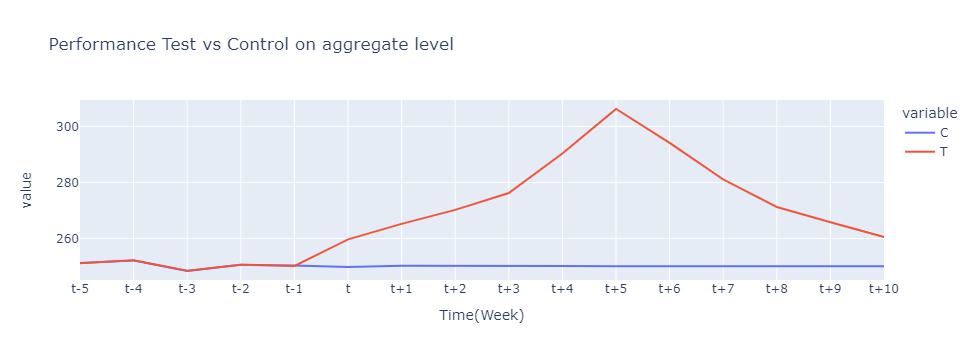

In [44]:
import plotly.express as px
# df = px.data.stocks()
fig = px.line(df3, x="Time(Week)", y=df3.columns[:-1],title='Performance Test vs Control on aggregate level')
# yaxis=dict(
#         title="Y label"
# fig.update_xaxes(
#     dtick="M1",
#     tickformat="%b\n%Y")
fig.show()

In [25]:
fig.write_html("templates/graph_evaluate.html")

## Calculate KPIs

In [26]:
df3['uplift']=df3['T']-df3['C']
df3

flag,C,T,flag,uplift
t-5,251.245000,251.175580,t-5,-0.069420
t-4,252.166000,252.231620,t-4,0.065620
t-3,248.395000,248.496620,t-3,0.101620
t-2,250.602000,250.584800,t-2,-0.017200
t-1,250.387667,250.193966,t-1,-0.193701
t,249.794889,259.706772,t,9.911883
t+1,250.261519,265.228411,t+1,14.966893
t+2,250.148025,270.207933,t+2,20.059908
t+3,250.068144,276.250820,t+3,26.182676
t+4,250.159229,290.344209,t+4,40.184980


## Define period of evaluation

In [27]:
## define period of evaluation
# period=int(input('enter campaign evaluation period:'))

In [28]:
df4=df3.loc['t':]
df5=df4.iloc[:period]
df5

flag,C,T,flag,uplift
t,249.794889,259.706772,t,9.911883
t+1,250.261519,265.228411,t+1,14.966893
t+2,250.148025,270.207933,t+2,20.059908
t+3,250.068144,276.250820,t+3,26.182676
t+4,250.159229,290.344209,t+4,40.184980
t+5,250.125133,306.241806,t+5,56.116674


In [29]:
kpi=pd.DataFrame([(df5['uplift'].sum())],columns=['Uplift per customer'])
kpi['#customers in campaign']=len(test_cnt)
kpi['Total uplift']=(df5['uplift'].sum())*len(test_cnt)

In [30]:
kpi

,Uplift per customer,#customers in campaign,Total uplift
0,167.423014,1000,167423.013802


## Enter Cost of campaign

In [31]:
# cost=int(input('enter cost of campaign:'))

In [32]:
kpi['campaign cost']=cost
kpi['ROI']=kpi['Total uplift']/cost
kpi['performance window']=str(period )+' weeks'

In [ ]:
# kpi.drop(['#customers in campaign'], axis=1, inplace=True)
kpi.iloc[0]


In [ ]:
import json

In [ ]:
data = dict()

In [ ]:
data['uplift_value'] = str(kpi['Uplift per customer'][0])

In [ ]:
data['scr_value'] = str(kpi['ROI'][0])

In [ ]:
data['total_uplift_value'] = str(kpi['Total uplift'][0])

In [ ]:
data['campaign_cost_value'] = str(kpi['campaign cost'][0])

In [ ]:
data['performance_wind_value'] = str(kpi['performance window'][0].split()[0])

In [ ]:
print(data)

In [ ]:
for value in data:
    print(type(data[value]))

In [ ]:
f = open ('file.txt','w')
f.write(json.dumps(data))
f.close()